In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score, confusion_matrix
import xgboost as xgb
import numpy as np

from keras.preprocessing.image import load_img, img_to_array

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import time

In [2]:
data = pd.DataFrame(columns=['image_path', 'label'])

#define the labels&classes
labels = {
    '/kaggle/input/satellite-image-classification/data/cloudy': 'cloudy',
    '/kaggle/input/satellite-image-classification/data/desert': 'desert',
    '/kaggle/input/satellite-image-classification/data/green_area': 'green_area',
    '/kaggle/input/satellite-image-classification/data/water': 'water',
}

In [3]:
data_list = []
#loop through each label directory and add file paths and labels to the list
for path, label in labels.items():
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg'):
                file_path = os.path.join(root, file)
                data_list.append({'image_path': file_path, 'label': label})

#converting the list to a dataframe
data = pd.DataFrame(data_list)
print(data.head())

                                          image_path   label
0  /kaggle/input/satellite-image-classification/d...  cloudy
1  /kaggle/input/satellite-image-classification/d...  cloudy
2  /kaggle/input/satellite-image-classification/d...  cloudy
3  /kaggle/input/satellite-image-classification/d...  cloudy
4  /kaggle/input/satellite-image-classification/d...  cloudy


In [ ]:
data.tail()

In [4]:
data.head()

,image_path,label
0,/kaggle/input/satellite-image-classification/d...,cloudy
1,/kaggle/input/satellite-image-classification/d...,cloudy
2,/kaggle/input/satellite-image-classification/d...,cloudy
3,/kaggle/input/satellite-image-classification/d...,cloudy
4,/kaggle/input/satellite-image-classification/d...,cloudy


In [5]:
data.tail()

,image_path,label
5626,/kaggle/input/satellite-image-classification/d...,water
5627,/kaggle/input/satellite-image-classification/d...,water
5628,/kaggle/input/satellite-image-classification/d...,water
5629,/kaggle/input/satellite-image-classification/d...,water
5630,/kaggle/input/satellite-image-classification/d...,water


In [6]:
def load_and_preprocess_image(image_path, image_size=(28, 28)):
    image = load_img(image_path, target_size=image_size) # load and resize image
    image = img_to_array(image) # convert image to numpy array
    image = image / 255.0
    return image

In [7]:
X = []
y = []

for index, row in data.iterrows():
    image_path = row['image_path']
    label = row['label']
    try:
        image = load_and_preprocess_image(image_path)
        X.append(image)
        y.append(label)
    except Exception as e:
        print(f"Error processing image: {image_path}, Error: {e}")

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (5631, 28, 28, 3)
y shape: (5631,)


Classes found by label encoder: ['cloudy' 'desert' 'green_area' 'water']
X_train shape: (4504, 28, 28, 3), X_val shape: (1127, 28, 28, 3), y_train shape: (4504, 4), y_val shape: (1127, 4)


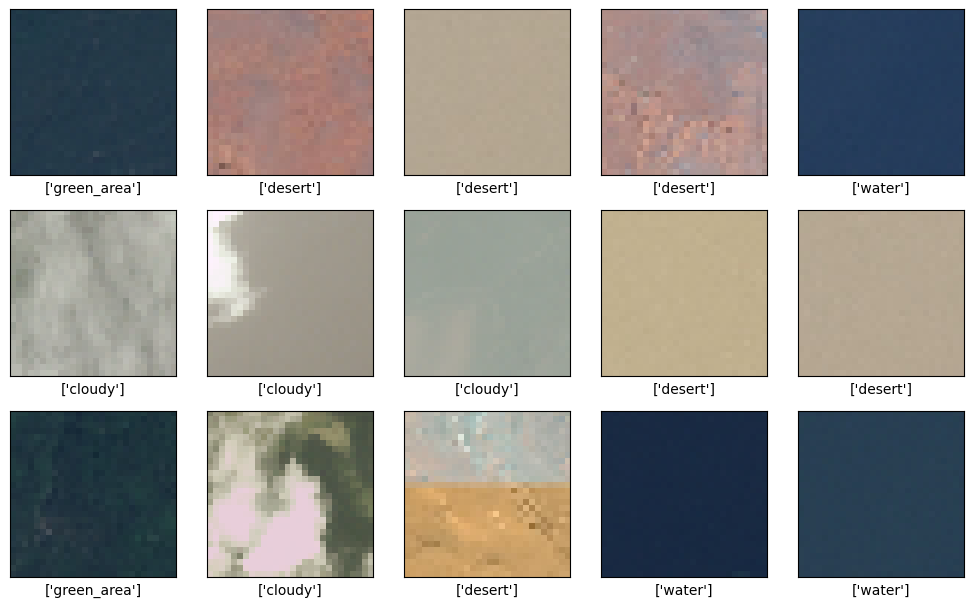

In [8]:
if y.size > 0:
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    print("Classes found by label encoder:", label_encoder.classes_)
    
    # One-hot encoding of labels
    y_one_hot = to_categorical(y_encoded)
    
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    
    print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}, y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")
    
    # Visualize some images from X_train
    plt.figure(figsize=(10, 10))
    for i in range(15):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[i], cmap=plt.cm.binary)
        plt.xlabel(label_encoder.inverse_transform([np.argmax(y_train[i])])) # Show the label
    plt.tight_layout()
    plt.show()

else:
    print("Error: y is empty")

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4504, 28, 28, 3) (1127, 28, 28, 3) (4504, 4) (1127, 4)


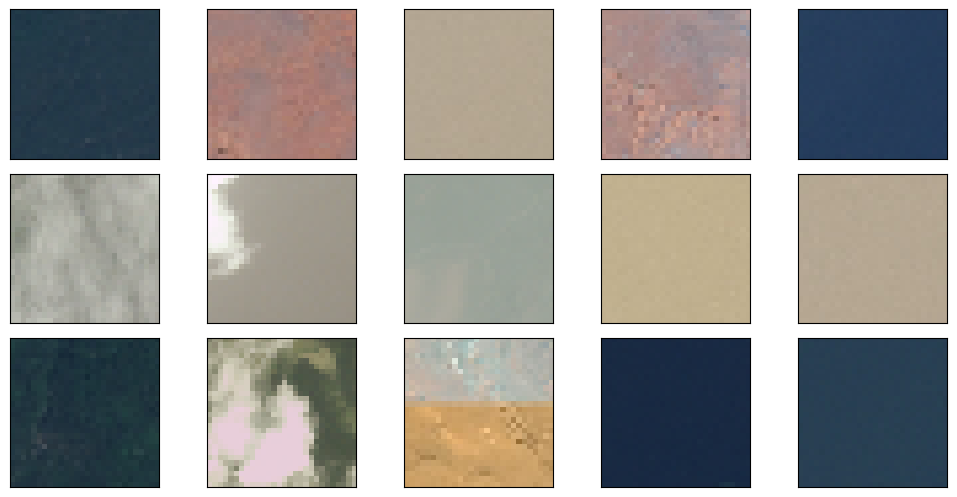

In [10]:
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.tight_layout()
plt.show()

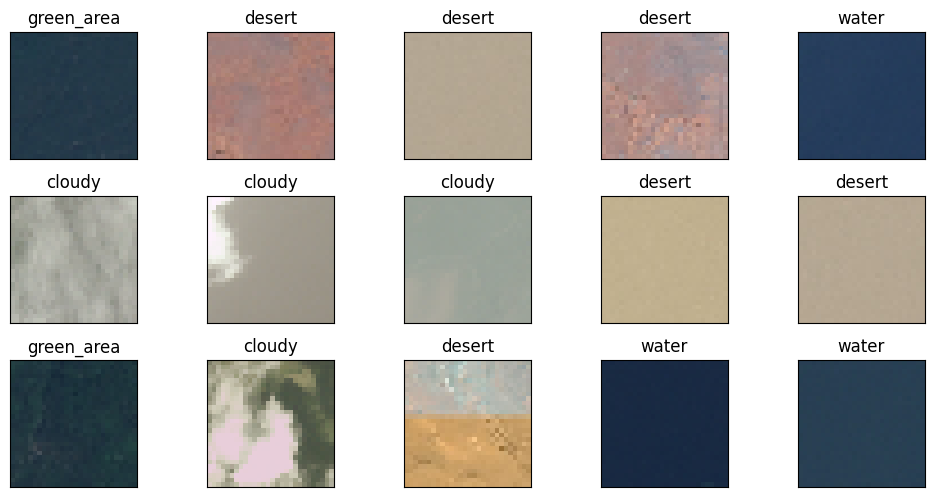

In [11]:
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    
    # We can find which class each image belongs to using y_train
    class_index = y_train[i].argmax()
    class_name = label_encoder.classes_[class_index]
    plt.title(class_name)
    
plt.tight_layout()
plt.show()


Class: cloudy, Total images: 3


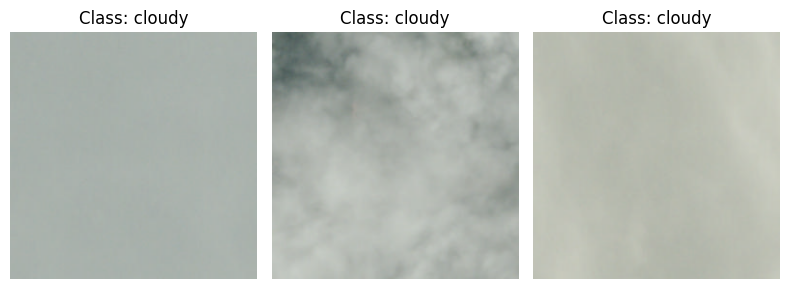

Class: desert, Total images: 3


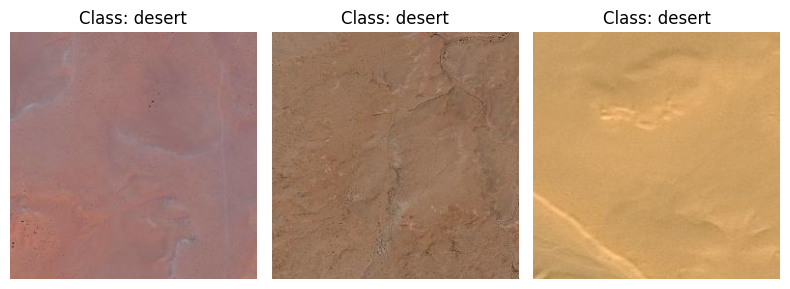

Class: green_area, Total images: 3


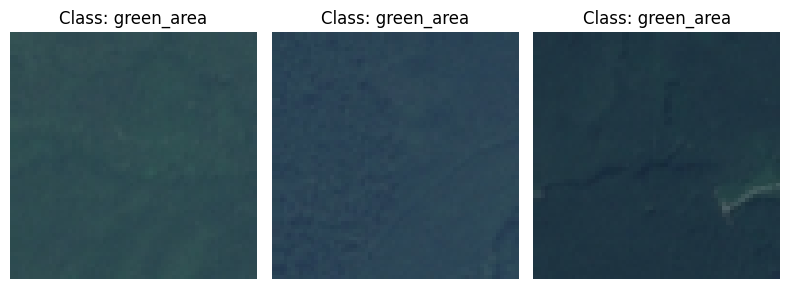

Class: water, Total images: 3


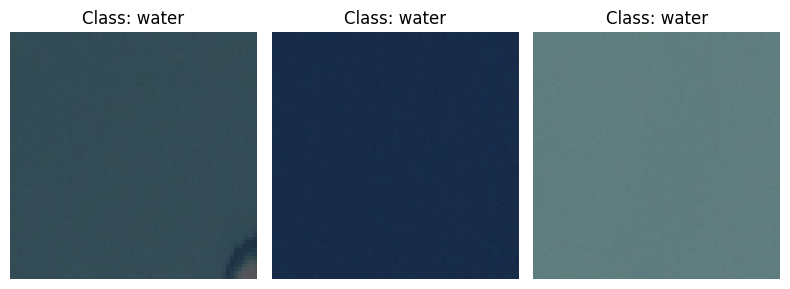

In [12]:
def show_first_images_from_each_class(data, labels, num_images=3):
    classes = pd.unique(labels)
    
    for cls in classes:
        class_data = data[data['label'] == cls].head(num_images)
        num_samples = len(class_data)
        print(f"Class: {cls}, Total images: {num_samples}")
        
        plt.figure(figsize=(8, 4))
        
        for i in range(num_samples):
            image_path = class_data.iloc[i]['image_path']
            image = plt.imread(image_path)
            plt.subplot(1, num_images, i+1)
            plt.imshow(image)
            plt.title(f"Class: {cls}")
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
#Example usage:
show_first_images_from_each_class(data, data['label'], num_images=3)

In [13]:
def plot_confusion_matrix(cm, title):
    num_classes = cm.shape[0]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(title)
    plt.show()

In [14]:
def train_knn(X_train, y_train, X_test, y_test):
    # Train the K-NN model with training data
    knn_model = KNeighborsClassifier()
    start = time.time()
    knn_model.fit(X_train.reshape(len(X_train), -1), y_train.argmax(axis=1))
    end = time.time()
    training_time = end - start
    print(f"KNN Training Time        : {training_time:.2f} seconds")
    
    # Make predictions on test data
    y_pred = knn_model.predict(X_test.reshape(len(X_test), -1))
    
    # Calculate performance metrics
    print("KNN Accuracy             :", accuracy_score(y_test.argmax(axis=1), y_pred))
    precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1 = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    
    print("Precision                :", precision)
    print("Recall                   :", recall)
    print("F1 Score                 :", f1)
    print("KNN Classification Report:")
    print(classification_report(y_test.argmax(axis=1), y_pred))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
    
    # Visualization
    plot_confusion_matrix(cm, 'KNN Confusion Matrix')

In [16]:
def train_random_forest(X_train, y_train, X_test, y_test):
    # Train the Random Forest model with training data
    rf_model = RandomForestClassifier(random_state=42)
    start = time.time()
    rf_model.fit(X_train.reshape(len(X_train), -1), y_train.argmax(axis=1))
    end = time.time()
    training_time = end - start
    print(f"Random Forest Training Time: {training_time:.2f} seconds")
    
    # Make predictions on test data
    y_pred = rf_model.predict(X_test.reshape(len(X_test), -1))
    
    # Calculate performance metrics
    print("Random Forest Accuracy   :", accuracy_score(y_test.argmax(axis=1), y_pred))
    precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1 = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    
    print("Precision                :", precision)
    print("Recall                   :", recall)
    print("F1 Score                 :", f1)
    print("Random Forest Classification Report:")
    print(classification_report(y_test.argmax(axis=1), y_pred))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
    
    # Visualization
    plot_confusion_matrix(cm, 'Random Forest Confusion Matrix')

In [17]:
def train_decision_tree(X_train, y_train, X_test, y_test):
    # Train the Decision Tree model with training data
    dt_model = DecisionTreeClassifier(random_state=42)
    start = time.time()
    dt_model.fit(X_train.reshape(len(X_train), -1), y_train.argmax(axis=1))
    end = time.time()
    training_time = end - start
    print(f"Decision Tree Training Time: {training_time:.2f} seconds")
    
    # Make predictions on test data
    y_pred = dt_model.predict(X_test.reshape(len(X_test), -1))
    
    # Calculate performance metrics
    print("Decision Tree Accuracy   :", accuracy_score(y_test.argmax(axis=1), y_pred))
    precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1 = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    
    print("Precision                :", precision)
    print("Recall                   :", recall)
    print("F1 Score                 :", f1)
    print("Decision Tree Classification Report:")
    print(classification_report(y_test.argmax(axis=1), y_pred))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
    
    # Visualization
    plot_confusion_matrix(cm, 'Decision Tree Confusion Matrix')

In [18]:
def train_svm(X_train, y_train, X_test, y_test):
    # Train the SVM model with training data
    svm_model = SVC(random_state=42)
    start = time.time()
    svm_model.fit(X_train.reshape(len(X_train), -1), y_train.argmax(axis=1))
    end = time.time()
    training_time = end - start
    print(f"SVM Training Time        : {training_time:.2f} seconds")
    
    # Make predictions on test data
    y_pred = svm_model.predict(X_test.reshape(len(X_test), -1))
    
    # Calculate performance metrics
    print("SVM Accuracy             :", accuracy_score(y_test.argmax(axis=1), y_pred))
    precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1 = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    
    print("Precision                :", precision)
    print("Recall                   :", recall)
    print("F1 Score                 :", f1)
    print("SVM Classification Report:")
    print(classification_report(y_test.argmax(axis=1), y_pred))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
    
    # Visualization
    plot_confusion_matrix(cm, 'SVM Confusion Matrix')

In [19]:
def train_xgboost(X_train, y_train, X_test, y_test):
    # Train the XGBoost model with training data
    xgb_model = xgb.XGBClassifier(random_state=42)
    start = time.time()
    xgb_model.fit(X_train.reshape(len(X_train), -1), y_train.argmax(axis=1))
    end = time.time()
    training_time = end - start
    print(f"XGBoost Training Time    : {training_time:.2f} seconds")
    
    # Make predictions on test data
    y_pred = xgb_model.predict(X_test.reshape(len(X_test), -1))
    
    # Calculate performance metrics
    print("XGBoost Accuracy         :", accuracy_score(y_test.argmax(axis=1), y_pred))
    precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1 = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    
    print("Precision                :", precision)
    print("Recall                   :", recall)
    print("F1 Score                 :", f1)
    print("XGBoost Classification Report:")
    print(classification_report(y_test.argmax(axis=1), y_pred))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
    
    # Visualization
    plot_confusion_matrix(cm, 'XGBoost Confusion Matrix')

In [21]:
def train_gradient_boosting(X_train, y_train, X_test, y_test):
    # Train the Gradient Boosting model with training data
    gb_model = GradientBoostingClassifier(random_state=42)
    start = time.time()
    gb_model.fit(X_train.reshape(len(X_train), -1), y_train.argmax(axis=1))
    end = time.time()
    training_time = end - start
    print(f"Gradient Boosting Training Time: {training_time:.2f} seconds")
    
    # Make predictions on test data
    y_pred = gb_model.predict(X_test.reshape(len(X_test), -1))
    
    # Calculate performance metrics
    print("Gradient Boosting Accuracy   :", accuracy_score(y_test.argmax(axis=1), y_pred))
    precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1 = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')
    
    print("Precision                    :", precision)
    print("Recall                       :", recall)
    print("F1 Score                     :", f1)
    print("Gradient Boosting Classification Report:")
    print(classification_report(y_test.argmax(axis=1), y_pred))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
    
    # Visualization
    plot_confusion_matrix(cm, 'Gradient Boosting Confusion Matrix')

KNN Training Time        : 0.01 seconds
KNN Accuracy             : 0.8606921029281278
Precision                : 0.8867238524159108
Recall                   : 0.8606921029281278
F1 Score                 : 0.8571986631880876
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       328
           1       0.99      0.91      0.94       227
           2       0.95      0.59      0.73       284
           3       0.69      0.97      0.81       288

    accuracy                           0.86      1127
   macro avg       0.89      0.86      0.86      1127
weighted avg       0.89      0.86      0.86      1127



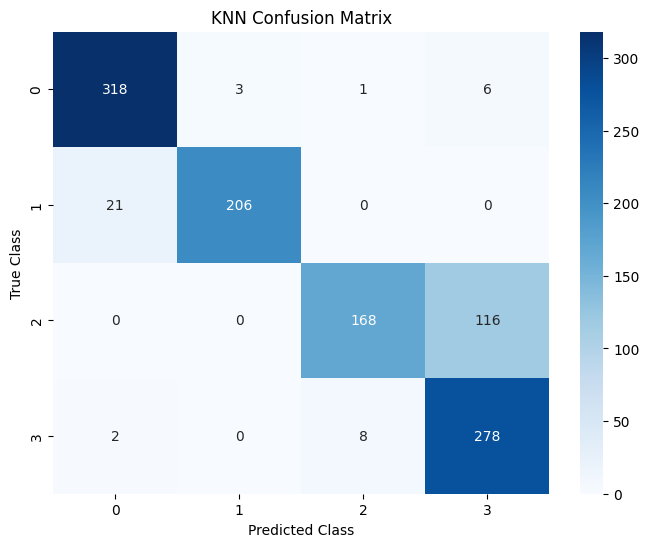

In [22]:
train_knn(X_train, y_train, X_test, y_test)

Random Forest Training Time: 7.97 seconds
Random Forest Accuracy   : 0.9449866903283053
Precision                : 0.9455240326318799
Recall                   : 0.9449866903283053
F1 Score                 : 0.9450552251456601
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       328
           1       0.99      0.96      0.97       227
           2       0.91      0.94      0.92       284
           3       0.93      0.91      0.92       288

    accuracy                           0.94      1127
   macro avg       0.95      0.94      0.95      1127
weighted avg       0.95      0.94      0.95      1127



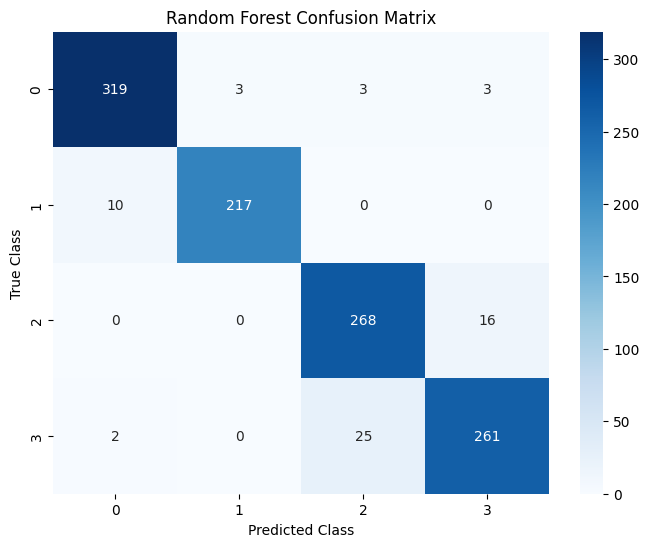

In [23]:
train_random_forest(X_train, y_train, X_test, y_test)

Decision Tree Training Time: 5.75 seconds
Decision Tree Accuracy   : 0.8970718722271517
Precision                : 0.8978447259992156
Recall                   : 0.8970718722271517
F1 Score                 : 0.8973653964739297
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       328
           1       0.96      0.93      0.94       227
           2       0.86      0.86      0.86       284
           3       0.84      0.86      0.85       288

    accuracy                           0.90      1127
   macro avg       0.90      0.90      0.90      1127
weighted avg       0.90      0.90      0.90      1127



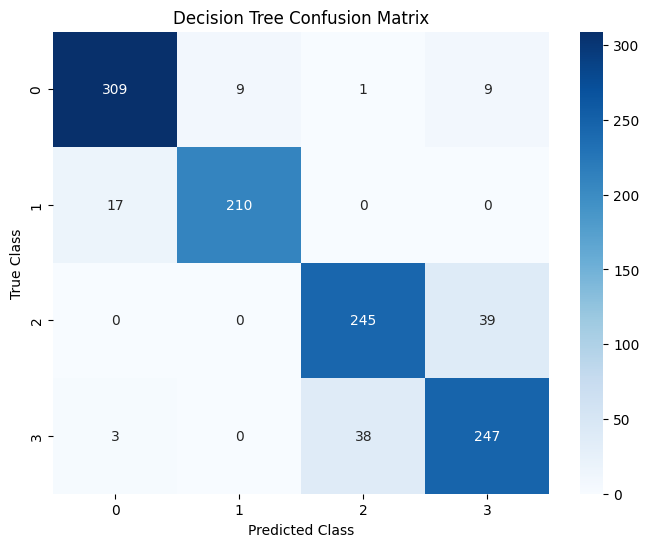

In [24]:
train_decision_tree(X_train, y_train, X_test, y_test)

SVM Training Time        : 6.99 seconds
SVM Accuracy             : 0.8979591836734694
Precision                : 0.904094800846262
Recall                   : 0.8979591836734694
F1 Score                 : 0.8975024791201968
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       328
           1       0.94      0.95      0.94       227
           2       0.80      0.95      0.87       284
           3       0.92      0.77      0.84       288

    accuracy                           0.90      1127
   macro avg       0.90      0.90      0.90      1127
weighted avg       0.90      0.90      0.90      1127



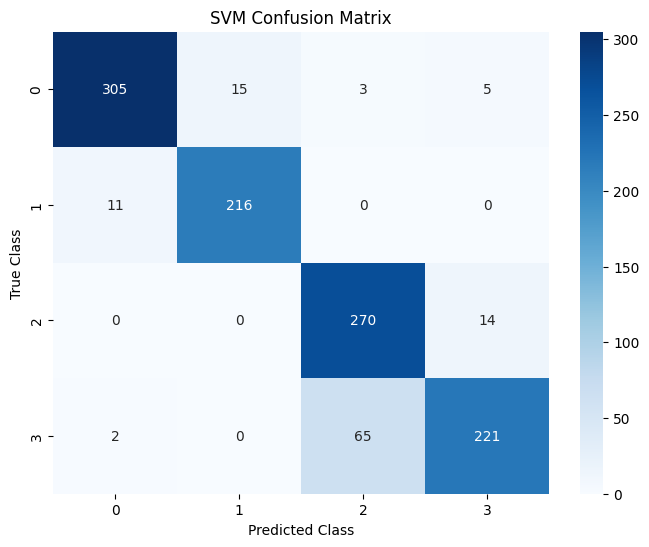

In [25]:
train_svm(X_train, y_train, X_test, y_test)

XGBoost Training Time    : 51.58 seconds
XGBoost Accuracy         : 0.9485359361135759
Precision                : 0.9488579404376293
Recall                   : 0.9485359361135759
F1 Score                 : 0.9486350159264336
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       328
           1       0.99      0.96      0.98       227
           2       0.92      0.94      0.93       284
           3       0.93      0.92      0.92       288

    accuracy                           0.95      1127
   macro avg       0.95      0.95      0.95      1127
weighted avg       0.95      0.95      0.95      1127



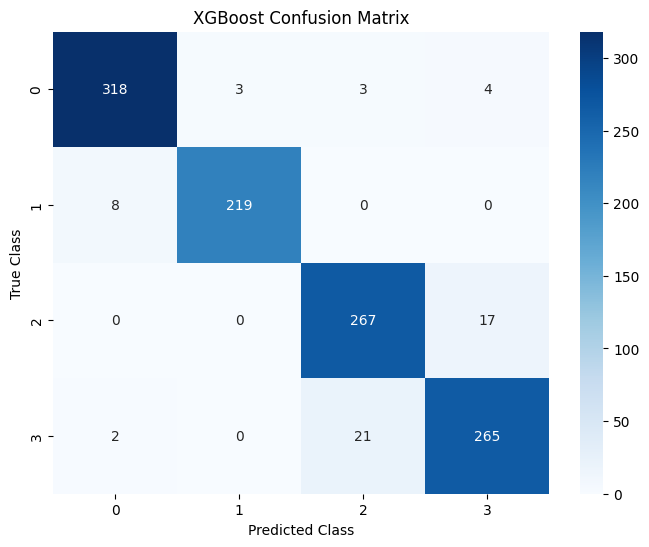

In [26]:
train_xgboost(X_train, y_train, X_test, y_test)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,412,836 (32.09 MB)

 Trainable params: 8,412,836 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
import cv2 as cv
from pathlib import Path 
from tqdm import tqdm 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split 
import tensorflow as tf 
from keras import layers 
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy 
from keras.optimizers import Adam 
from sklearn.preprocessing import LabelEncoder 
import pandas as pd 
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report 

In [32]:
cloudy=Path('/kaggle/input/satellite-image-classification/data/cloudy/')
cloudy_images=cloudy.glob('*')


In [38]:
# Jupyter cell magic command to measure execution time


import cv2 as cv2
from tqdm import tqdm
from pathlib import Path

# Define the classes for image classification
classes = ['cloudy', 'desert', 'green_area', 'water']

# Initialize an empty list to store the images and their corresponding class labels
images_arr = []

# Iterate through each class name
for class_name in tqdm(classes):  # Use tqdm for progress bar visualization
    # Define the path to the directory containing images for the current class
    path = Path(f'/kaggle/input/satellite-image-classification/data/{class_name}/')
    
    # Get all image file paths in the current class directory
    images = path.glob('*')
    
    # Iterate through each image file
    for img in images:
        # Read the image using OpenCV
        img_arr = cv2.imread(str(img))  # Convert Path object to string
        
        # Resize the image to (128, 128) for consistent input size
        if img_arr is not None:  # Ensure the image was read successfully
            img_arr = cv2.resize(img_arr, (128, 128))
            
            # Append the class name and image array as a tuple to the images_arr list
            images_arr.append((class_name, img_arr))




100%|██████████| 4/4 [00:06<00:00,  1.57s/it]


In [39]:
# single image 
images_arr[0]

('cloudy',
 array([[[173, 177, 168],
         [173, 177, 168],
         [172, 176, 167],
         ...,
         [173, 180, 172],
         [173, 181, 170],
         [175, 181, 172]],
 
        [[174, 177, 168],
         [173, 177, 168],
         [171, 176, 167],
         ...,
         [174, 180, 175],
         [174, 181, 173],
         [174, 181, 174]],
 
        [[172, 177, 168],
         [171, 177, 168],
         [170, 176, 167],
         ...,
         [174, 180, 173],
         [174, 181, 171],
         [174, 181, 172]],
 
        ...,
 
        [[173, 177, 169],
         [174, 177, 169],
         [174, 177, 169],
         ...,
         [174, 180, 172],
         [174, 180, 172],
         [174, 180, 172]],
 
        [[173, 177, 169],
         [174, 177, 169],
         [174, 177, 169],
         ...,
         [174, 181, 172],
         [174, 181, 172],
         [174, 181, 172]],
 
        [[173, 177, 169],
         [174, 177, 169],
         [174, 177, 169],
         ...,
         [174, 18

In [40]:
# creating list of classes 
class_names=[]
# creating list of images 
images_array=[]
for class_name , arr in images_arr : 
    class_names.append(class_name)
    images_array.append(arr)
result_dict={'class':class_names,'image':images_array}

In [41]:
# creating a dataframe of loaded images and classes 
df=pd.DataFrame(result_dict)
df 

,class,image
0,cloudy,"[[[173, 177, 168], [173, 177, 168], [172, 176,..."
1,cloudy,"[[[119, 123, 113], [114, 121, 109], [111, 118,..."
2,cloudy,"[[[178, 190, 187], [178, 190, 187], [177, 189,..."
3,cloudy,"[[[178, 183, 178], [177, 182, 178], [176, 182,..."
4,cloudy,"[[[165, 173, 164], [165, 173, 164], [165, 173,..."
...,...,...
5626,water,"[[[81, 76, 45], [81, 76, 45], [81, 76, 45], [8..."
5627,water,"[[[101, 122, 73], [101, 122, 73], [101, 122, 7..."
5628,water,"[[[97, 86, 72], [97, 86, 72], [97, 86, 72], [9..."
5629,water,"[[[81, 60, 38], [81, 60, 38], [81, 60, 38], [8..."


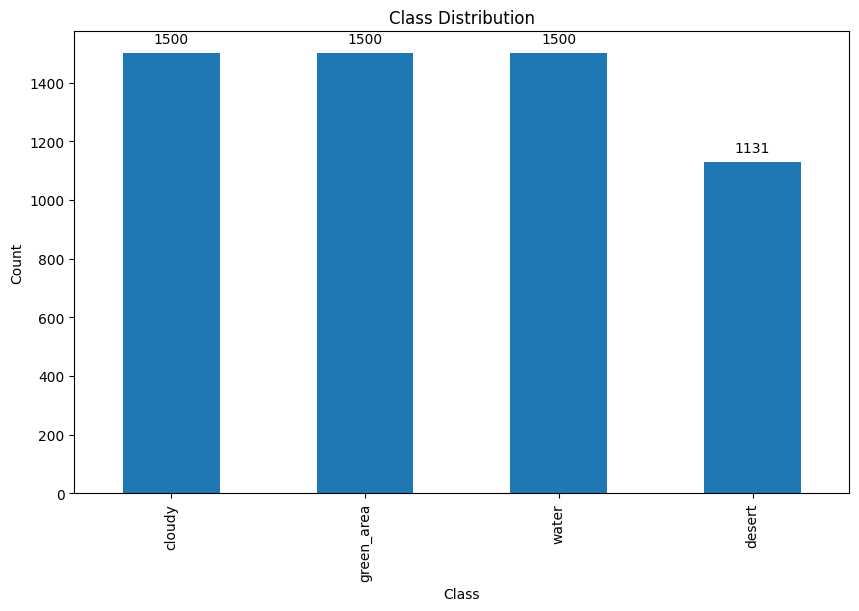

In [42]:
# Generate the bar plot
ax = df['class'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

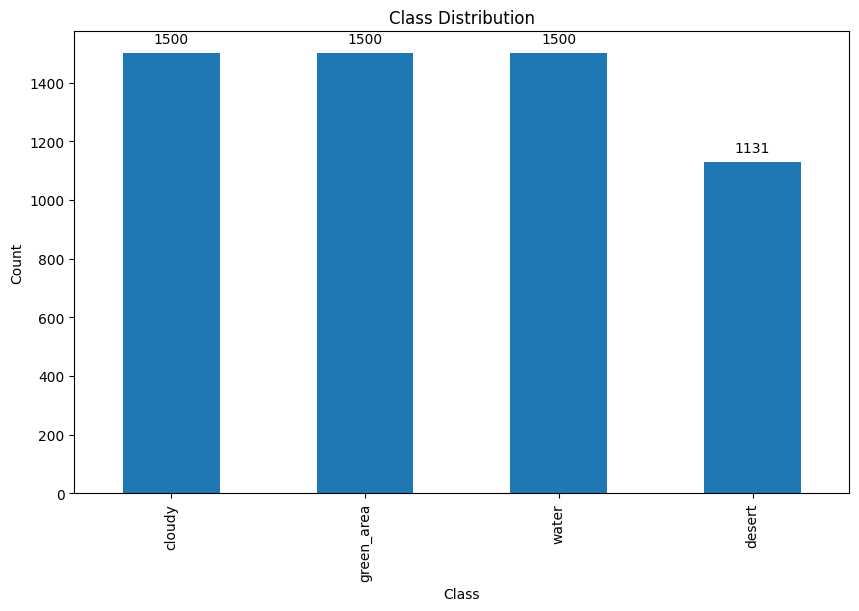

In [43]:
# Generate the bar plot
ax = df['class'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [44]:
df_1=df.copy()
# scaling images 
df_1['image']=df_1['image'].apply(lambda x : x/255)
df_1

,class,image
0,cloudy,"[[[0.6784313725490196, 0.6941176470588235, 0.6..."
1,cloudy,"[[[0.4666666666666667, 0.4823529411764706, 0.4..."
2,cloudy,"[[[0.6980392156862745, 0.7450980392156863, 0.7..."
3,cloudy,"[[[0.6980392156862745, 0.7176470588235294, 0.6..."
4,cloudy,"[[[0.6470588235294118, 0.6784313725490196, 0.6..."
...,...,...
5626,water,"[[[0.3176470588235294, 0.2980392156862745, 0.1..."
5627,water,"[[[0.396078431372549, 0.47843137254901963, 0.2..."
5628,water,"[[[0.3803921568627451, 0.33725490196078434, 0...."
5629,water,"[[[0.3176470588235294, 0.23529411764705882, 0...."


In [45]:
# encoding class column  
encoder=LabelEncoder() 
df_1['class']=encoder.fit_transform(df_1['class'])
df_1 

,class,image
0,0,"[[[0.6784313725490196, 0.6941176470588235, 0.6..."
1,0,"[[[0.4666666666666667, 0.4823529411764706, 0.4..."
2,0,"[[[0.6980392156862745, 0.7450980392156863, 0.7..."
3,0,"[[[0.6980392156862745, 0.7176470588235294, 0.6..."
4,0,"[[[0.6470588235294118, 0.6784313725490196, 0.6..."
...,...,...
5626,3,"[[[0.3176470588235294, 0.2980392156862745, 0.1..."
5627,3,"[[[0.396078431372549, 0.47843137254901963, 0.2..."
5628,3,"[[[0.3803921568627451, 0.33725490196078434, 0...."
5629,3,"[[[0.3176470588235294, 0.23529411764705882, 0...."


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Number of classes for classification
num_classes = 4

# Define the model architecture using a Sequential model
model = Sequential([
    # Input Layer
    layers.Input(shape=(128, 128, 3)),
    
    # First Convolutional Layer
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    
    # Max Pooling Layer
    layers.MaxPool2D(),
    
    # Second Convolutional Layer
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    
    # Max Pooling Layer
    layers.MaxPool2D(),
    
    # Third Convolutional Layer
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    
    # Flatten Layer
    layers.Flatten(),
    
    # Fully Connected (Dense) Layer
    layers.Dense(128, activation='relu'),
    
    # Output Layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print a summary of the model architecture
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,412,836 (32.09 MB)

 Trainable params: 8,412,836 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
#  features  are scaled images 
X=df_1['image']
# target is encoded class 
y=df_1['class']
# splitting into train and test with 20% test size 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [49]:
# shape of single image 
X_train[0].shape 

(128, 128, 3)

In [50]:
# Convert X_train to a NumPy array with dtype=float32
X_train = np.array([np.array(x, dtype=np.float32) for x in X_train])

# Convert y_train to a NumPy array
y_train = np.array(y_train)

# Convert X_test to a NumPy array with dtype=float32
X_test = np.array([np.array(x, dtype=np.float32) for x in X_test])

# Convert y_test to a NumPy array
y_test = np.array(y_test)

In [51]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (you can use 'val_accuracy' if needed)
    patience=20,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore the weights of the best epoch
    verbose=1)
# training model without data augmentation for 100 epochs with early stopping callback to handel overfitting 
model_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[early_stopping])

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 46s 312ms/step - accuracy: 0.6850 - loss: 0.7513 - val_accuracy: 0.8394 - val_loss: 0.3785
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 43s 307ms/step - accuracy: 0.8346 - loss: 0.3955 - val_accuracy: 0.8571 - val_loss: 0.3481
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 44s 313ms/step - accuracy: 0.8635 - loss: 0.3487 - val_accuracy: 0.8767 - val_loss: 0.3165
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 43s 307ms/step - accuracy: 0.8715 - loss: 0.3091 - val_accuracy: 0.8811 - val_loss: 0.3084
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 43s 307ms/step - accuracy: 0.8631 - loss: 0.3222 - val_accuracy: 0.8864 - val_loss: 0.2738
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 82s 304ms/step - accuracy: 0.8696 - loss: 0.3018 - val_accuracy: 0.8953 - val_loss: 0.2689
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 83s 311ms/step - accuracy: 0.9028 - loss: 0.2571 - val_accuracy: 0.8864 - val_loss: 0.2760
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 43s 304ms/step - accuracy: 0.9072 -

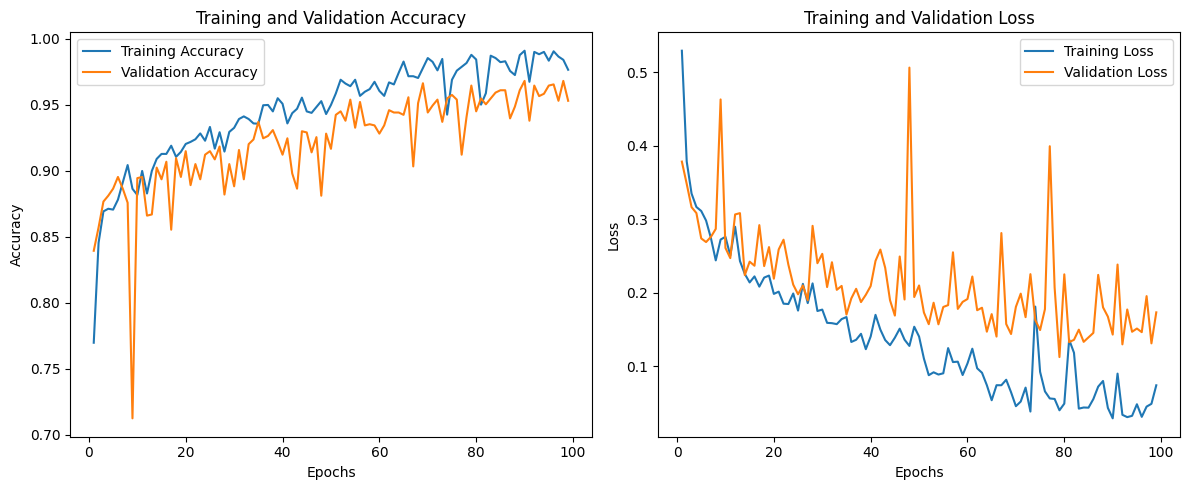

In [52]:
# function to plot loss and accuracy curves 
def plot_loss_accuracy(history):
    """
    Plots the training and validation loss and accuracy curves.

    Parameters:
    history: History object returned by model.fit(), containing loss and accuracy values.

    Returns:
    None
    """
    # Extracting accuracy and loss data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Number of epochs
    epochs = range(1, len(acc) + 1)

    # Plotting the accuracy curves
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss,  label='Training Loss')
    plt.plot(epochs, val_loss,  label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Display plots
    plt.tight_layout()
    plt.show()
plot_loss_accuracy(model_history)

In [53]:
# predicting classes probabilities of test images using cnn model 
y_pred=model.predict(X_test)
y_pred 

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step


array([[2.8840596e-08, 6.0738691e-15, 9.9996454e-01, 3.5441284e-05],
       [3.9656218e-02, 9.6034342e-01, 2.2583578e-12, 3.3219450e-07],
       [1.1881973e-08, 1.9021514e-16, 9.9999982e-01, 1.5060175e-07],
       ...,
       [3.8050490e-03, 9.9619496e-01, 1.3985083e-22, 1.1122504e-10],
       [2.1386788e-06, 9.9999750e-01, 6.1982132e-17, 4.0043611e-07],
       [9.8677778e-01, 2.8190119e-04, 1.7894056e-11, 1.2940331e-02]],
      dtype=float32)

In [54]:
y_pred.shape

(1127, 4)

In [55]:
# taking max prediction value of scores  
y_pred_classes=np.argmax(y_pred,axis=1)
y_pred_classes

array([2, 1, 2, ..., 1, 1, 0])

In [56]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       328
           1       0.95      0.98      0.97       227
           2       0.96      0.96      0.96       284
           3       0.96      0.95      0.96       288

    accuracy                           0.96      1127
   macro avg       0.96      0.97      0.96      1127
weighted avg       0.96      0.96      0.96      1127



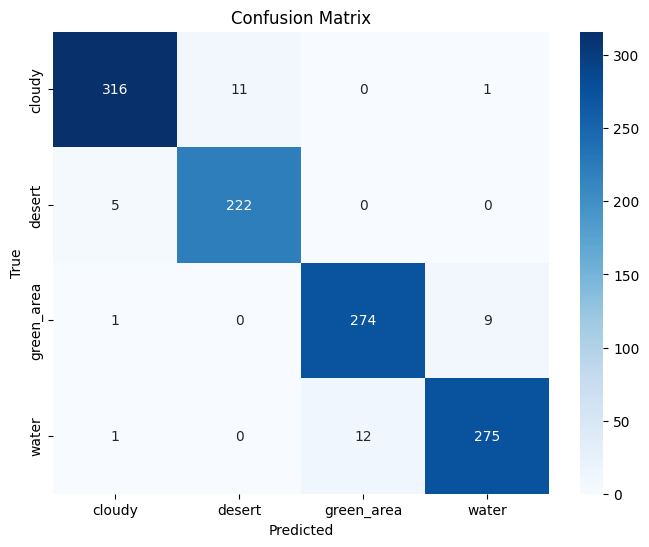

In [57]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    This function prints and plots a confusion matrix.
    y_true: true labels
    y_pred: predicted labels
    classes: list of class names
    """
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    
    # Add labels and titles
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    
    # Show the plot
    plt.show()
plot_confusion_matrix(y_test,y_pred_classes,classes)

In [58]:
# Define a Sequential model for data augmentation using Keras layers
data_augmentation = Sequential([
    # Randomly flip images horizontally with a 50% probability
    # 'input_shape' specifies the dimensions of the input images: 128x128 pixels with 3 color channels (BGR)
    # 'seed=42' ensures that the augmentation is reproducible
    layers.RandomFlip("horizontal", seed=42, input_shape=(128, 128, 3)),
    
    # Randomly rotate images by up to 10% of 360 degrees (±36 degrees)
    layers.RandomRotation(0.1, seed=42),
    
    # Randomly zoom into images by up to 10%
    layers.RandomZoom(0.1, seed=42),
    
    # Randomly adjust the contrast of images by up to 10%
    layers.RandomContrast(0.1, seed=42)
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


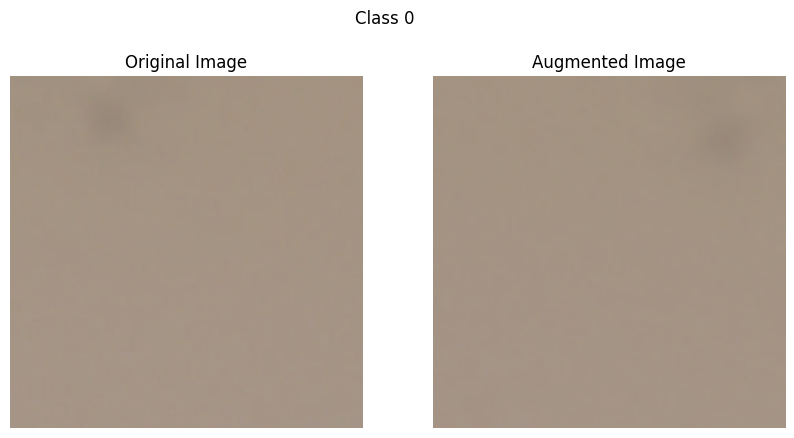

In [59]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random

# Assuming X is a series of images with pixel values scaled between 0 and 1
# Apply data augmentation
def display_augmented_image(image_num: int):
    # Apply data augmentation and expand dimensions to fit the model input
    augmented_image = data_augmentation(np.expand_dims(X[image_num], axis=0))  # Expand dims for batch

    # Convert the augmented image back to NumPy and remove the batch dimension
    augmented_image = augmented_image[0].numpy()

    # Since the image was originally scaled, we multiply by 255 to bring it back to standard pixel values
    augmented_image = (augmented_image * 255).astype('uint8')
    
    # Convert the image from BGR to RGB for Matplotlib display
    augmented_image = cv.cvtColor(augmented_image, cv.COLOR_BGR2RGB)

    # Display the original and augmented image side by side
    plt.figure(figsize=(10, 5))
    plt.suptitle(f'Class {y[image_num]}')

    # Display original image
    plt.subplot(1, 2, 1)
    original_img = X[image_num] * 255
    original_img = original_img.astype('uint8')
    
    # Convert original image from BGR to RGB for Matplotlib display
    original_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')

    # Display augmented image
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_image)
    plt.title('Augmented Image')
    plt.axis('off')

    plt.show()

# Example usage
image_num = random.randint(0, len(X) - 1)  # Adjust the range to be within bounds
display_augmented_image(image_num)

In [60]:
cnn_aug_model=Sequential([data_augmentation,
                          layers.Conv2D(16,3,padding='same',activation='relu'),
                          layers.MaxPool2D(),
                          layers.Conv2D(16,3,padding='same',activation='relu'),
                          layers.MaxPool2D(),
                          layers.Conv2D(16,3,padding='same',activation='relu'),
                          layers.MaxPool2D(),
                          layers.Flatten(),
                          layers.Dense(128,activation='relu'),
                          layers.Dense(num_classes,activation='softmax')])
cnn_aug_model.compile(loss=SparseCategoricalCrossentropy(),metrics=['accuracy'],optimizer=Adam())
cnn_aug_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (you can use 'val_accuracy' if needed)
    patience=20,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore the weights of the best epoch
    verbose=1)
# training cnn model ith data augmentation for 100 epochs with early stopping callbak  
aug_model_history=cnn_aug_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=[early_stopping])

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 36s 253ms/step - accuracy: 0.9747 - loss: 0.0721 - val_accuracy: 0.9645 - val_loss: 0.0944
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 35s 250ms/step - accuracy: 0.9783 - loss: 0.0689 - val_accuracy: 0.9760 - val_loss: 0.0794
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 35s 247ms/step - accuracy: 0.9503 - loss: 0.1337 - val_accuracy: 0.9618 - val_loss: 0.0999
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 35s 246ms/step - accuracy: 0.9807 - loss: 0.0573 - val_accuracy: 0.9760 - val_loss: 0.0677
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 35s 246ms/step - accuracy: 0.9835 - loss: 0.0561 - val_accuracy: 0.9645 - val_loss: 0.0971
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 41s 246ms/step - accuracy: 0.9765 - loss: 0.0696 - val_accuracy: 0.9778 - val_loss: 0.0589
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 41s 245ms/step - accuracy: 0.9813 - loss: 0.0494 - val_accuracy: 0.9485 - val_loss: 0.1323
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 35s 245ms/step - accuracy: 0.9784 - loss: 0

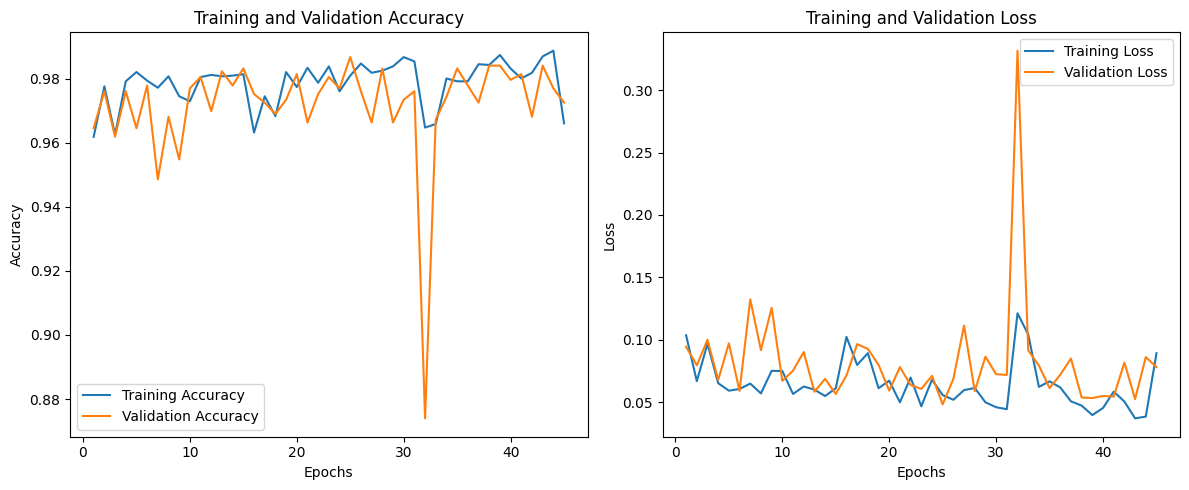

In [64]:
# plotting training curves of cnn model with data augmentation 
plot_loss_accuracy(aug_model_history)

In [65]:
y_scores_aug=cnn_aug_model.predict(X_test)
y_scores_aug

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step


array([[4.7807323e-15, 6.7864772e-22, 9.9999946e-01, 4.5959862e-07],
       [9.8465972e-02, 9.0151417e-01, 3.0366976e-07, 1.9593612e-05],
       [7.0168577e-10, 9.6308442e-15, 9.9999827e-01, 1.7280477e-06],
       ...,
       [5.1175758e-02, 9.4882292e-01, 6.9731190e-09, 1.4047213e-06],
       [4.5511645e-04, 9.9954468e-01, 3.5271437e-16, 1.2354487e-07],
       [9.9880362e-01, 8.5645064e-04, 3.3676048e-11, 3.3993923e-04]],
      dtype=float32)

In [66]:
y_pred_aug=np.argmax(y_scores_aug,axis=1)
y_pred_aug

array([2, 1, 2, ..., 1, 1, 0])

In [67]:
print(classification_report(y_test,y_pred_aug))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       328
           1       0.98      0.99      0.99       227
           2       0.99      0.99      0.99       284
           3       0.99      0.98      0.98       288

    accuracy                           0.99      1127
   macro avg       0.99      0.99      0.99      1127
weighted avg       0.99      0.99      0.99      1127



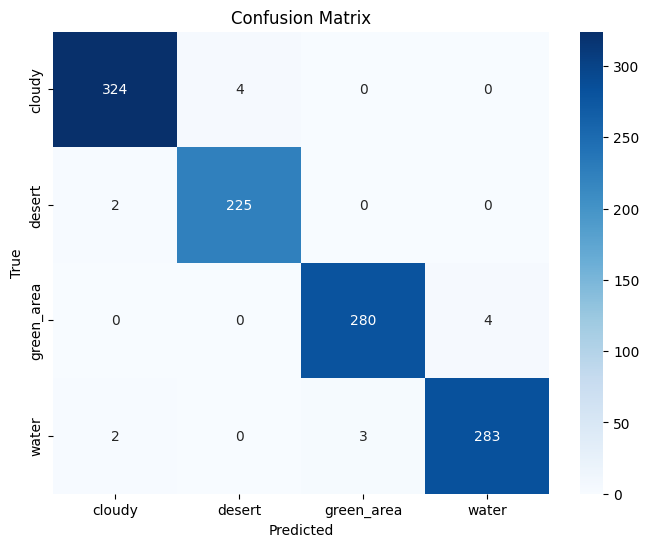

In [68]:
plot_confusion_matrix(y_test,y_pred_aug,classes)

In [69]:
class_dict={0:'cloudy',1:'desert',2:'green_area',3:'water'}

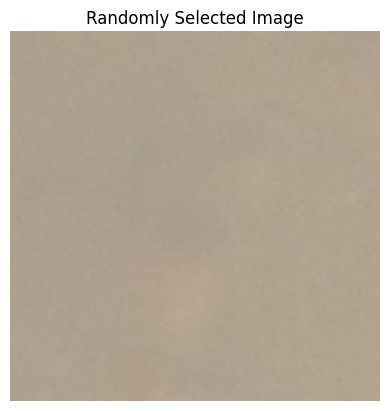

Model Prediction:
 desert
Actual Class:
 desert


In [70]:
# Randomly select an image from the test set
random_num = random.randint(0, len(X_test) - 1)

# Retrieve the randomly selected image from the test set
random_val_image = X_test[random_num]

# Convert the image from BGR (OpenCV default) to RGB (Matplotlib expected format) for correct display
img = cv.cvtColor(random_val_image, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Randomly Selected Image')
plt.axis('off')
plt.show()

# Prepare the image for model prediction
# Add a batch dimension to the image (necessary for model input)
random_val_image = np.expand_dims(random_val_image, axis=0)

# Convert the image to float32 type, as expected by the model
random_val_image = np.array(random_val_image, dtype='float32')

# Retrieve the actual class label for the randomly selected image
class_name = y_test[random_num]

# Predict the class of the image using the trained model
pred_scores = cnn_aug_model.predict(random_val_image, verbose=0)

# Determine the predicted class label by finding the index with the highest probability
pred_label = np.argmax(pred_scores, axis=1)

# Print the model's predicted class and the actual class
print('Model Prediction:\n', class_dict[pred_label[0]])
print('Actual Class:\n', class_dict[class_name])